# **Hypothyroidism: An Approach to Anomaly Detection**
Authors:

Ahmed ElAlfy, Matr. Num. 910411, MSc AI4ST, a.elalfy@campus.unimib.it

Hero Rfaat Mohammed, Matr. Num. 908424, MSc AI4ST, h.mohammed@campus.unimib.it

Mohammed Faidi, Matr. Num. 910044, MSc AI4ST, m.faidi@campus.unimib.it

In [ ]:
# Install necessary package
!pip install gower

# Basic Libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced data visualization

# TensorFlow and Keras for Machine Learning and Deep Learning (Implementing Autoencoders)
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.losses import mse

# Distance Calculation Libraries
import gower  # For calculating Gower distance
from scipy.spatial.distance import pdist, squareform, mahalanobis
  # Pairwise distance calculations and Mahalanobis distance

# Clustering Libraries
from scipy.cluster import hierarchy  # Hierarchical clustering methods
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster  # Linkage and dendrogram and fcluster methods for hierarchical clustering

# Scikit-learn Libraries for Preprocessing, Dimensionality Reduction, and Outlier Detection
from sklearn.preprocessing import (StandardScaler, Normalizer, MinMaxScaler,
                                   RobustScaler, OneHotEncoder)  # Various preprocessing methods
from sklearn.metrics import silhouette_score  # For evaluating clustering performance
from sklearn.decomposition import PCA  # Principal Component Analysis for dimensionality reduction
from sklearn.manifold import TSNE  # t-Distributed Stochastic Neighbor Embedding for dimensionality reduction
from sklearn.ensemble import IsolationForest  # Isolation Forest for outlier detection
from sklearn.neighbors import LocalOutlierFactor  # Local Outlier Factor for outlier detection

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

## 1.0 Importing & Preprocessing the data

In [ ]:
# Import the dataset and seperate CSV file by semicolon with Pandas
df = pd.read_csv('Project_Dataset.csv', delimiter=';', header=None)

df.head(15)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,Row,Dim_0,Dim_1=0,Dim_2=0,Dim_3=0,Dim_4=0,Dim_5=0,Dim_6=0,Dim_7=0,Dim_8=0,...,Dim_13=0,Dim_14=0,Dim_15=0,Dim_16,Dim_17,Dim_18,Dim_19,Dim_20,NaN,NaN
1,0,"0,750000",1,0,1,1,1,1,1,0,...,1,1,1,"0,001132","0,080780","0,197324","0,300926","0,225000",NaN,NaN
2,1,"0,239583",1,1,1,1,1,1,1,1,...,1,1,1,"0,000472","0,164345","0,235786","0,537037","0,165625",NaN,NaN
3,2,"0,479167",1,1,1,1,1,1,1,1,...,1,1,1,"0,003585","0,130919","0,167224","0,527778","0,118750",NaN,NaN
4,3,"0,656250",0,1,1,1,1,1,1,1,...,1,1,1,"0,001698","0,091922","0,125418","0,337963","0,129688",NaN,NaN
5,4,"0,229167",1,1,1,1,1,1,1,1,...,1,1,1,"0,000472","0,142061","0,229097","0,337963","0,235938",NaN,NaN
6,5,"0,708333",0,1,1,1,1,1,1,1,...,1,1,1,"0,000472","0,086351","0,140468","0,245370","0,189063",NaN,NaN
7,6,"0,875000",0,1,1,1,1,1,1,1,...,1,1,1,"0,000472","0,125348","0,210702","0,402778","0,185937",NaN,NaN
8,7,"0,489583",0,1,1,1,1,1,1,1,...,1,1,1,"0,003925","0,108635","0,140468","0,282407","0,168750",NaN,NaN
9,8,"0,687500",1,0,1,1,1,1,1,1,...,1,1,1,"0,002453","0,130919","0,142140","0,425926","0,121875",NaN,NaN


In [ ]:
# Drop the headings
df.drop(df.columns[0], axis=1,inplace=True)

# Drop NaN columns
df.drop(df.columns[22], axis=1, inplace=True)
df.drop(df.columns[21], axis=1, inplace=True)

# Drop index column
df = df.drop(0)

# Replace the decimal numbers ',' with '.' & convert to float type
df = df.apply(lambda x: x.str.replace(',', '.').astype(float))

# Conver column 1 to 16 to type int (boolean values: 0/1)
columns_to_convert = df.columns[1:16]
df[columns_to_convert] = df[columns_to_convert].astype(int)


In [ ]:
df.head(15)

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
1,0.750000,1,0,1,1,1,1,1,0,1,...,1,1,1,1,1,0.001132,0.080780,0.197324,0.300926,0.225000
2,0.239583,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.000472,0.164345,0.235786,0.537037,0.165625
3,0.479167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.003585,0.130919,0.167224,0.527778,0.118750
4,0.656250,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.001698,0.091922,0.125418,0.337963,0.129688
5,0.229167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.000472,0.142061,0.229097,0.337963,0.235938
6,0.708333,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.000472,0.086351,0.140468,0.245370,0.189063
7,0.875000,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.000472,0.125348,0.210702,0.402778,0.185937
8,0.489583,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.003925,0.108635,0.140468,0.282407,0.168750
9,0.687500,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,0.002453,0.130919,0.142140,0.425926,0.121875
10,0.781250,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.000189,0.158774,0.204013,0.513889,0.148438


In [ ]:
# Add values of the dataframe to an array
numpy_array = df.values

In [ ]:
def convert_to_integer(numpy_array):
    """
    Convert specific entries in a numpy array to integers.

    This function takes a numpy array as input and converts the entries in columns 1 to 15
    (inclusive) to integers. Other entries remain unchanged.

    Parameters:
    numpy_array (np.ndarray): A 2D numpy array containing the data to be converted.

    Returns:
    np.ndarray: A new numpy array with the specified entries converted to integers.
    """
    new_array = np.zeros(numpy_array.shape, dtype=object)
    for i in range(numpy_array.shape[0]):
        for j in range(numpy_array.shape[1]):
            value = numpy_array[i, j]
            if j in range(1,16):
                new_array[i, j] = int(value)
                continue
            new_array[i, j] = value
    return new_array

# Passing the data into
data = convert_to_integer(numpy_array)
print(data)

[[0.75 1 0 ... 0.197324 0.300926 0.225]
 [0.239583 1 1 ... 0.235786 0.537037 0.165625]
 [0.479167 1 1 ... 0.167224 0.527778 0.11875]
 ...
 [0.520833 1 1 ... 0.147157 0.231481 0.20625]
 [0.354167 0 1 ... 0.147157 0.333333 0.154688]
 [0.75 1 1 ... 0.132107 0.337963 0.1375]]


In [ ]:
# Define a palette of colours for the K clusters (useful for the next tasks)
PAL = [
    '#2E7D32',  # Dark Green
    '#FFC107',  # Amber
    '#2196F3',  # Blue
    '#FF5722',  # Deep Orange
    '#9C27B0',  # Purple
    '#FFEB3B',  # Yellow
    '#00BCD4',  # Cyan
    '#8BC34A',  # Light Green
    '#E91E63',  # Pink
    '#795548',  # Brown
]


[N,M] = np.shape(data)    # N=no. of objects, M=no. of attributes

print("The matrix has shape = ", np.shape(data))
print('It has %d objects and %d attributes.' % (N, M) )

The matrix has shape =  (7200, 21)
It has 7200 objects and 21 attributes.


PCA: explained variation per principal component: [0.31 0.16]

Applying tSNE...


<ipython-input-9-c13bf6fbe739>:38: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], ax=ax1, hue=LABELS, palette=PAL)
<ipython-input-9-c13bf6fbe739>:45: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], ax=ax2, hue=LABELS, palette=PAL)


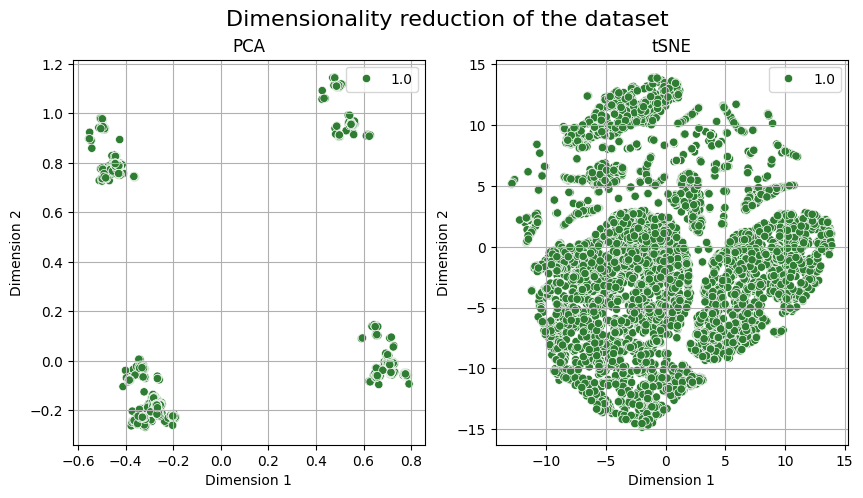

In [ ]:
# create a 2-dimensional visualization of the data using PCA for initial dimensionality reduction,
# then t-SNE for further embedding, with uniform labels or weights, and a specified color palette for the plot.

PCA_tSNE_visualization(data, 2, np.ones(N), PAL)

In [ ]:
# Split the continuous data from the binary data
data_first_cont = df.iloc[:, [0]]
data_last_cont = df.iloc[:, 16:21]
data_cont = np.concatenate([data_first_cont,data_last_cont],axis=1)
data_binary = df.iloc[:, 1:16]

In [ ]:
# Display continous data
data_cont

array([[7.50000e-01, 1.13200e-03, 8.07800e-02, 1.97324e-01, 3.00926e-01,
        2.25000e-01],
       [2.39583e-01, 4.72000e-04, 1.64345e-01, 2.35786e-01, 5.37037e-01,
        1.65625e-01],
       [4.79167e-01, 3.58500e-03, 1.30919e-01, 1.67224e-01, 5.27778e-01,
        1.18750e-01],
       ...,
       [5.20833e-01, 1.43400e-03, 1.09192e-01, 1.47157e-01, 2.31481e-01,
        2.06250e-01],
       [3.54167e-01, 5.28300e-03, 1.09192e-01, 1.47157e-01, 3.33333e-01,
        1.54688e-01],
       [7.50000e-01, 1.05700e-03, 1.09192e-01, 1.32107e-01, 3.37963e-01,
        1.37500e-01]])

In [ ]:
#  Show binary data shape
data_binary.shape

(7200, 15)

In [ ]:
# Show continous data shape
data_cont.shape

(7200, 6)

In [ ]:
# Apply the scaling to continuous data
# StandardScaler: z = (x - u) / s

# Initialize the scaler you want to use
scaler = StandardScaler()

# Apply the scaling to data
data_cont = scaler.fit_transform(data_cont)

# Combine binary and scaled continuous data into a single dataset
data_mixed = np.concatenate([data_binary,data_cont,],axis=1)

In [ ]:
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
1,0.750000,1,0,1,1,1,1,1,0,1,...,1,1,1,1,1,0.001132,0.080780,0.197324,0.300926,0.225000
2,0.239583,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.000472,0.164345,0.235786,0.537037,0.165625
3,0.479167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.003585,0.130919,0.167224,0.527778,0.118750
4,0.656250,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.001698,0.091922,0.125418,0.337963,0.129688
5,0.229167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.000472,0.142061,0.229097,0.337963,0.235938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,0.604167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0.004717,0.113092,0.128763,0.379630,0.121875
7197,0.520833,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.200000,0.030641,0.005017,0.333333,0.005469
7198,0.520833,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0.001434,0.109192,0.147157,0.231481,0.206250
7199,0.354167,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.005283,0.109192,0.147157,0.333333,0.154688


In [ ]:
# Convert NumPy array to DataFrame to rearrange the columns
df_rearranged = pd.DataFrame(data_mixed)

# Display the DataFrame
print(df_rearranged)


       0    1    2    3    4    5    6    7    8    9   ...   11   12   13  \
0     1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  ...  1.0  1.0  1.0   
1     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
2     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
3     0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
4     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
7195  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
7196  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
7197  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
7198  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
7199  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   

       14        15        16        17        18        19    

# 1.2 Visualizations


<ipython-input-18-7e916df609ef>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_rearranged[attr], kde=True, ax=axes[row, col], palette=PAL)
<ipython-input-18-7e916df609ef>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_rearranged[attr], kde=True, ax=axes[row, col], palette=PAL)
<ipython-input-18-7e916df609ef>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_rearranged[attr], kde=True, ax=axes[row, col], palette=PAL)
<ipython-input-18-7e916df609ef>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_rearranged[attr], kde=True, ax=axes[row, col], palette=PAL)
<ipython-input-18-7e916df609ef>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_rearranged[attr], kde=True, ax=axes[row, col], palette=PAL)
<ipython-input-18-7e916df609ef>:6: UserWarning: Ig

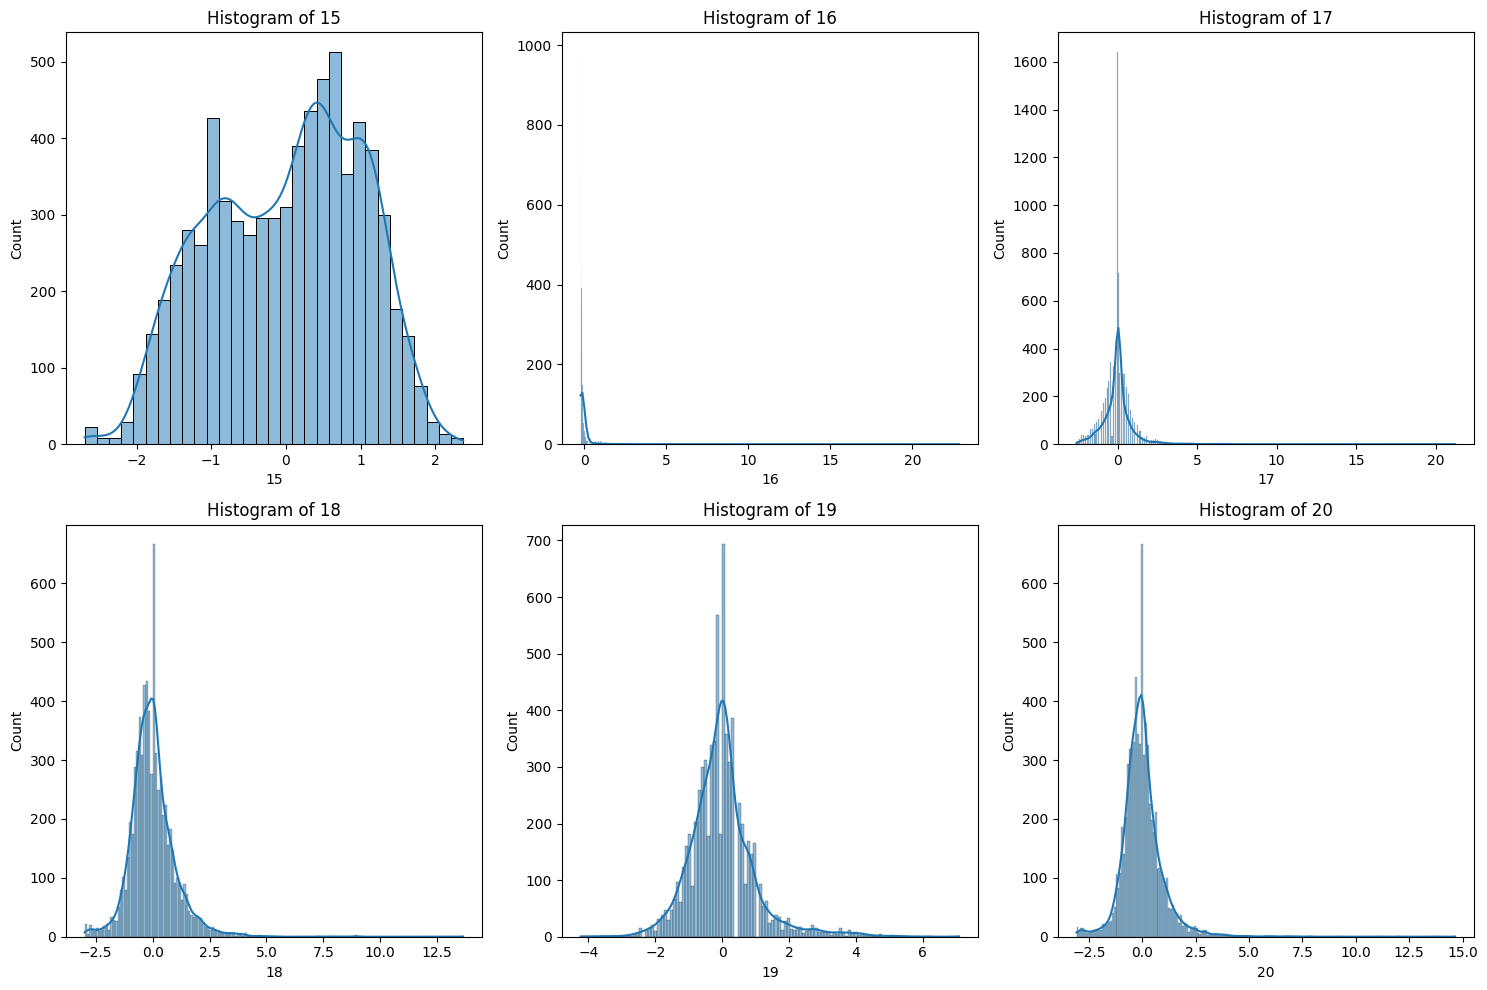

In [ ]:
# Create a grid of histograms for continuous attributes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust the grid size based on the number of attributes

for i, attr in enumerate(df_rearranged[df_rearranged.columns[15:21]]):
    row, col = divmod(i, 3)  # Get the row and column index
    sns.histplot(df_rearranged[attr], kde=True, ax=axes[row, col], palette=PAL
                 )
    axes[row, col].set_title(f'Histogram of {attr}')


# Adjust layout
plt.tight_layout()
plt.show()

<ipython-input-19-b5c1fbef2f9a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_rearranged[attr], ax=axes[row, col], palette=PAL)
<ipython-input-19-b5c1fbef2f9a>:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x=df_rearranged[attr], ax=axes[row, col], palette=PAL)
<ipython-input-19-b5c1fbef2f9a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_rearranged[attr], ax=axes[row, col], palette=PAL)
<ipython-input-19-b5c1fbef2f9a>:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x=df_rearranged[attr], ax=axes[row, col], palette=PAL)
<ipython-input-19-b5

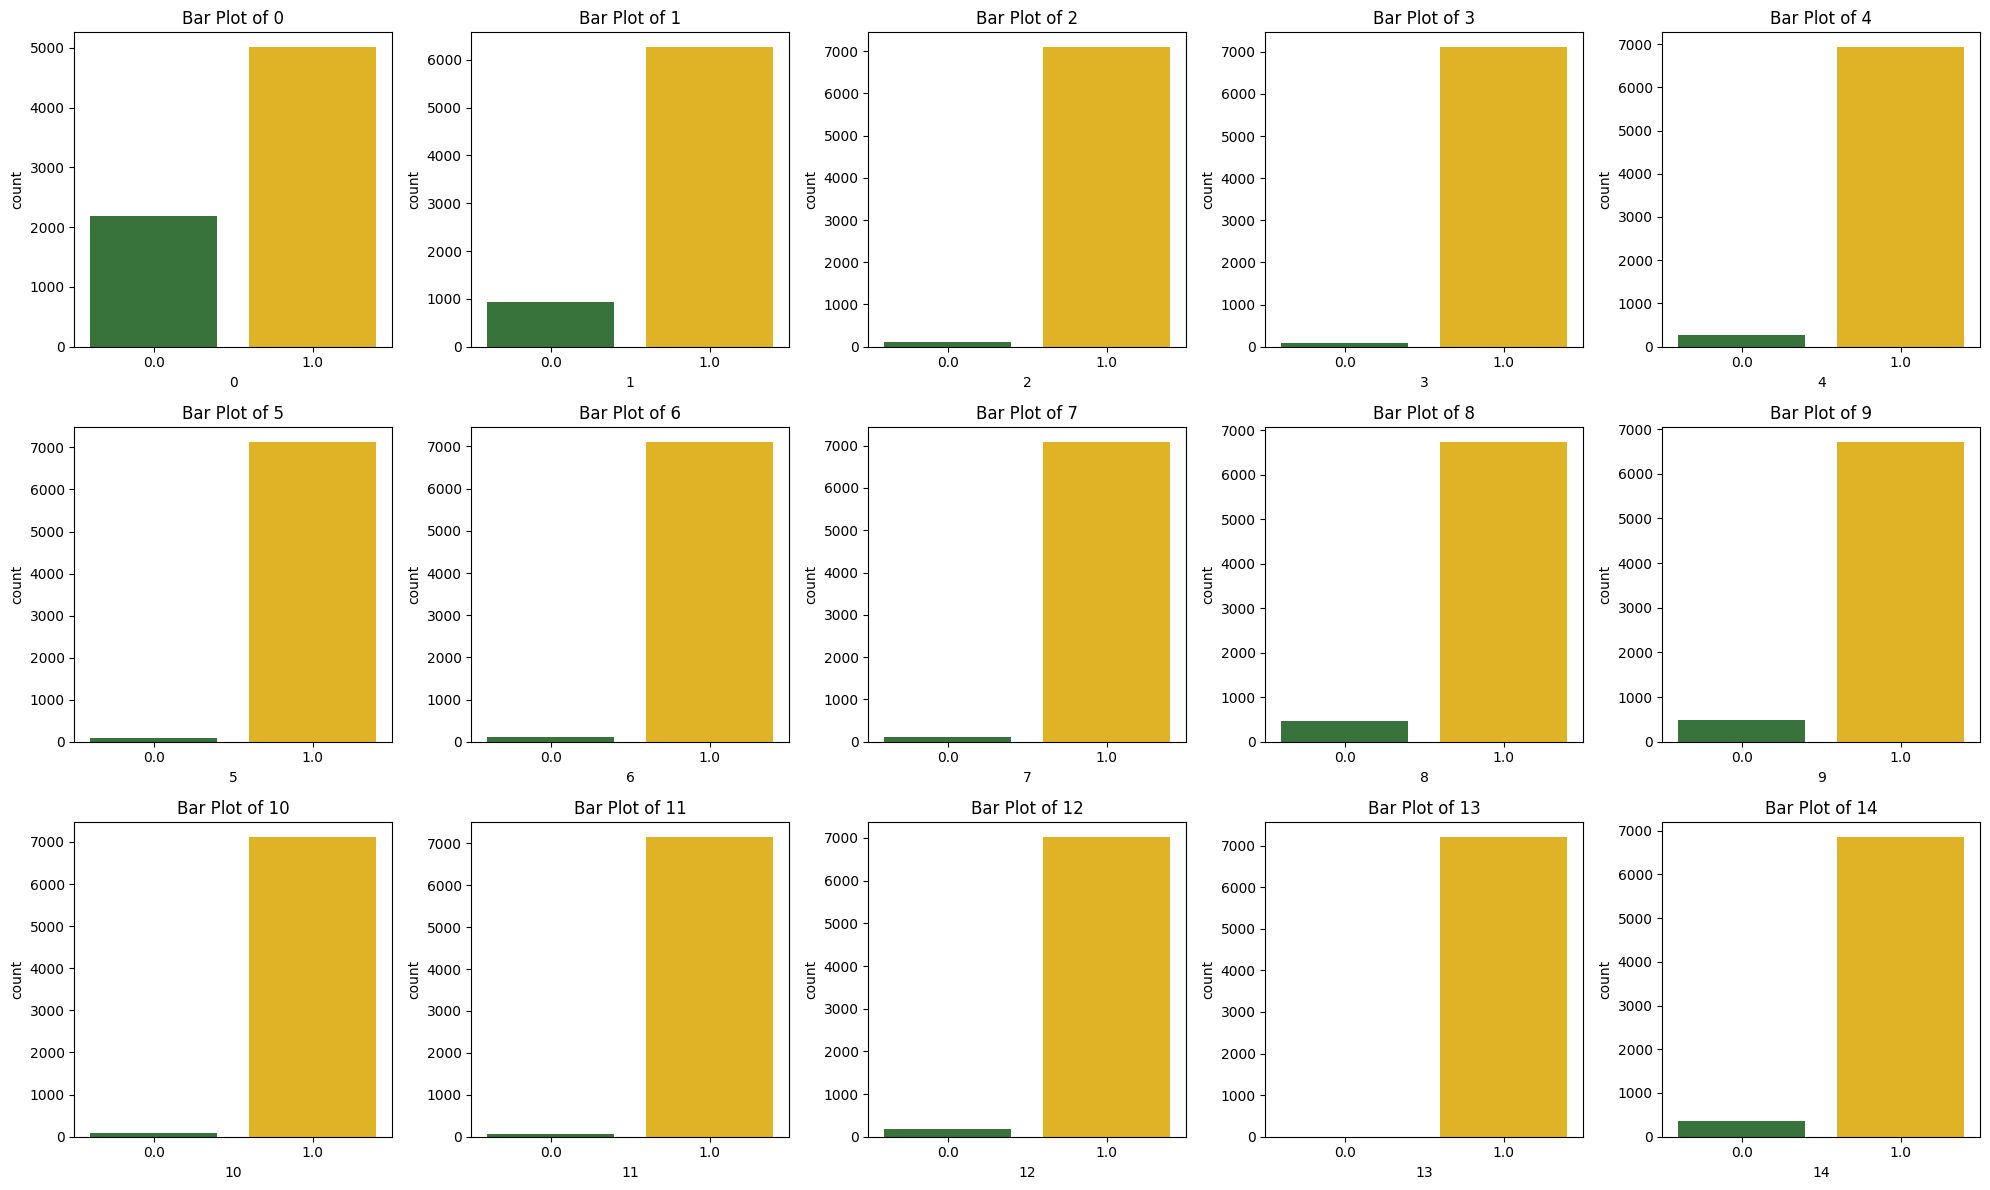

In [ ]:
# Create a grid of bar plots for binary attributes
fig, axes = plt.subplots(3, 5, figsize=(20, 12))  # 3 rows, 5 columns for 15 binary attributes

for i, attr in enumerate(df_rearranged[df_rearranged.columns[0:15]]):
    row, col = divmod(i, 5)  # Get the row and column index
    sns.countplot(x=df_rearranged[attr], ax=axes[row, col], palette=PAL)
    axes[row, col].set_title(f'Bar Plot of {attr}')

# Adjust layout
plt.tight_layout()
plt.show()

## 2.0 Outliers Detection for Binary Attributes

# 2.1 Method: Mahalanobis Distance

In [ ]:
def mahalanobis_outliers(data_binary):

    # Calculate the mean vector of the binary data
    mean_vector = data_binary.mean().values

    # Calculate the covariance matrix of the binary data
    cov_matrix = data_binary.cov().values

    # Calculate the inverse of the covariance matrix
    inv_cov_matrix = np.linalg.inv(cov_matrix)

    # Initialize a list to store Mahalanobis distances
    mahalanobis_dist = []

    # Calculate the Mahalanobis distance for each row in the binary data
    for _, row in data_binary.iterrows():
        mahalanobis_dist.append(mahalanobis(row.values, mean_vector, inv_cov_matrix))

    # Calculate the threshold for identifying outliers
    threshold = np.mean(mahalanobis_dist) + 3 * np.std(mahalanobis_dist) # Adjust the threshold as needed

     # Identify outliers based on the calculated threshold
    outliers = data_binary.index[mahalanobis_dist > threshold]

    return outliers, mahalanobis_dist, threshold

# Detect outliers using the Mahalanobis distance method
outliers_mahalanobis, mahalanobis_dist, threshold = mahalanobis_outliers(data_binary)

# Print the detected outliers
print("Outliers detected by Mahalanobis Distance:")
print(outliers_mahalanobis)

# Print the number of detected outliers
print(" Number of Outliers detected by Mahalanobis Distance:")
print(len(outliers_mahalanobis))

Outliers detected by Mahalanobis Distance:
Index([  53,  193,  398,  417,  515,  557,  581,  590,  647,  713,  719,  814,
        817,  880,  920, 1024, 1078, 1124, 1130, 1287, 1312, 1314, 1368, 1409,
       1412, 1627, 1749, 1949, 2173, 2266, 2323, 2328, 2359, 2372, 2644, 2847,
       2890, 2916, 2943, 2977, 3033, 3137, 3181, 3189, 3208, 3293, 3328, 3356,
       3379, 3398, 3405, 3517, 3631, 3662, 3670, 3844, 3866, 3873, 3875, 3987,
       4063, 4068, 4078, 4200, 4234, 4352, 4370, 4503, 4587, 4598, 4664, 4832,
       5047, 5145, 5463, 5636, 5640, 5730, 6033, 6071, 6083, 6118, 6375, 6681,
       6830, 6855, 7017, 7043, 7063, 7117],
      dtype='int64')
 Number of Outliers detected by Mahalanobis Distance:
90


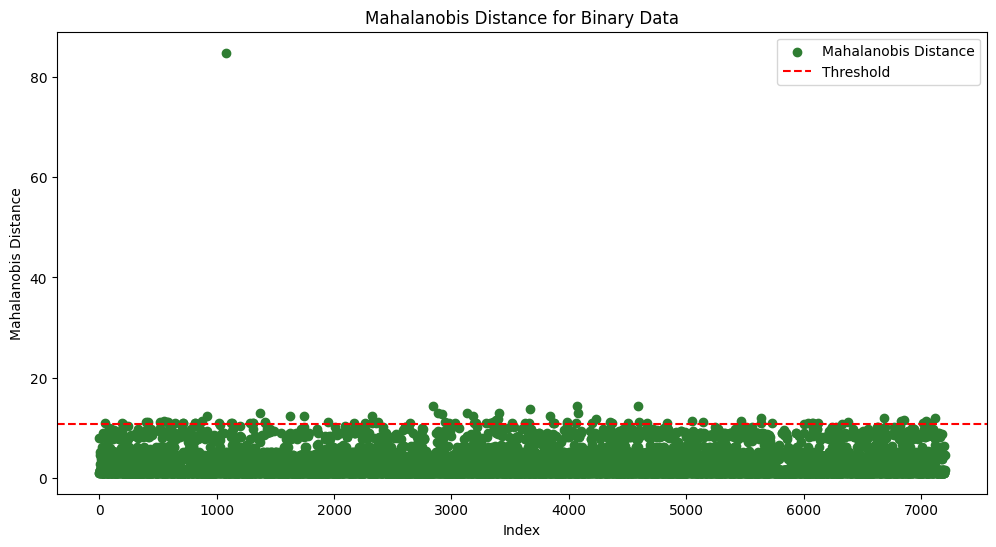

In [ ]:
# Visualizing the results
plt.figure(figsize=(12, 6))
plt.scatter(range(len(mahalanobis_dist)), mahalanobis_dist, label='Mahalanobis Distance', c=PAL[0])
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Index')
plt.ylabel('Mahalanobis Distance')
plt.title('Mahalanobis Distance for Binary Data')
plt.legend()
plt.show()

#  2.2 Method: Isolation Forest

In [ ]:

def isolation_forest_outliers(data_binary):
    clf = IsolationForest(contamination=0.005) # Adjust contamination parameter as needed
    clf.fit(data_binary)
    outliers = data_binary.index[clf.predict(data_binary) == -1]
    return outliers

outliers_isolation_forest = isolation_forest_outliers(data_binary)
print("Outliers detected by Isolation Forest:")
print(outliers_isolation_forest)


print("Number of Outliers detected by Isolation Forest:")
print(len(outliers_isolation_forest))


Outliers detected by Isolation Forest:
Index([ 418,  880,  920, 1202, 1368, 1626, 1627, 1749, 2263, 2270, 2345, 2890,
       3137, 3181, 3401, 3405, 3601, 3670, 3676, 3844, 3984, 4107, 4604, 4609,
       4987, 5206, 5232, 5437, 5507, 5522, 5640, 6274, 6630, 6681, 6767, 7017],
      dtype='int64')
Number of Outliers detected by Isolation Forest:
36


Text(0.5, 1.0, 'Outlier Detection')

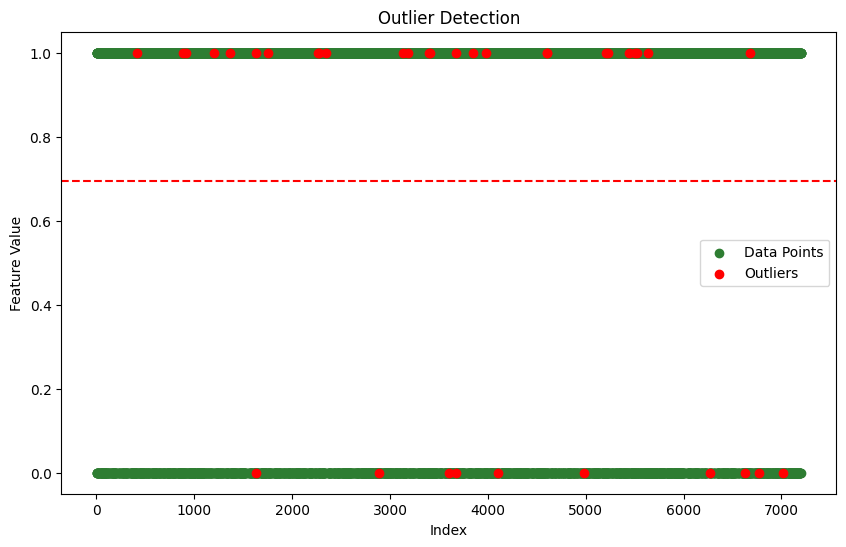

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data_binary.index, data_binary.iloc[:, 0], c=PAL[0], label='Data Points')
plt.scatter(outliers_isolation_forest, data_binary.iloc[outliers_isolation_forest, 0], c='red', label='Outliers')
plt.axhline(y=np.mean(data_binary.iloc[:, 0]), color='r', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.legend()
plt.title('Outlier Detection')

In [ ]:
# Intersection between the  binary outliers detected by the Isolation Forest and the Mahalanobis
common_binary_outliers = set(outliers_isolation_forest).intersection(set(outliers_mahalanobis))
print("Common binary outliers indices:")
print(common_binary_outliers)

Common binary outliers indices:
{3137, 1368, 3844, 5640, 7017, 2890, 3405, 3181, 880, 1749, 3670, 920, 6681, 1627}


## 3 Outliers Detection for Continuous

# 3.1 Method: Principal Component Analysis

PCA: explained variation per principal component: [0.38 0.23]


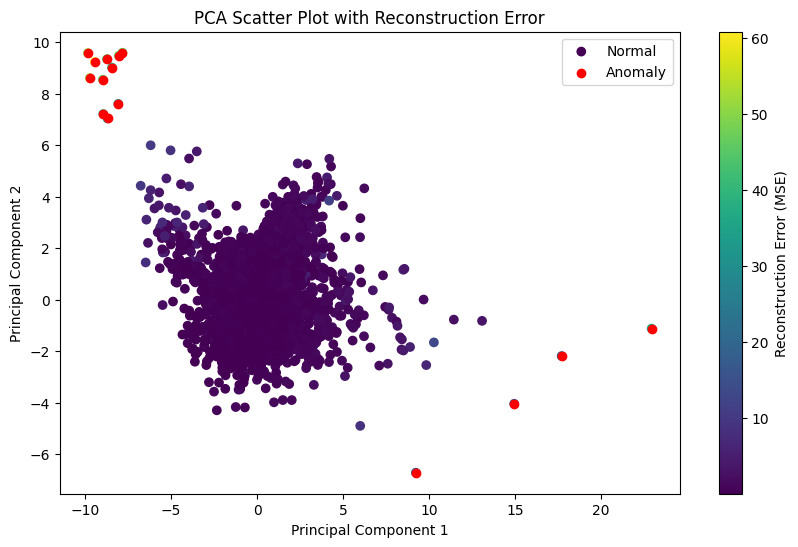

In [ ]:
# Design parameters
NCOMP = 2    # number of components

# Apply the algo
pca = PCA(n_components=NCOMP)
pca_result = pca.fit_transform(data_cont)
print('PCA: explained variation per principal component: {}'.format(pca.explained_variance_ratio_.round(2)))

# Compute the reconstruction error for every data point

data_reconstructed = pca.inverse_transform(pca_result)
mse = np.mean(np.square(data_cont - data_reconstructed), axis=1)

threshold = np.mean(mse) + 3 * np.std(mse)

# Identify anomalies
anomalies = mse > 15

# Plotting
plt.figure(figsize=(10, 6))
sc = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=mse, cmap='viridis', label='Normal')
plt.colorbar(sc, label='Reconstruction Error (MSE)')
plt.scatter(pca_result[anomalies, 0], pca_result[anomalies, 1], color='red', label='Anomaly')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot with Reconstruction Error')
plt.legend()
plt.show()


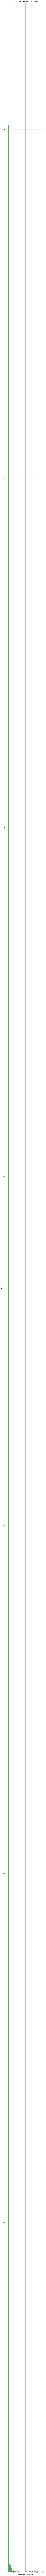

In [ ]:
# Histogram of the reconstruction errors
plt.figure(figsize=(6, 400))
plt.hist(mse, bins=50, alpha=0.75, color=PAL[0])
plt.title('Histogram of Reconstruction Errors')
plt.xlabel('Reconstruction Error (MSE)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Retrieve the indices of the anomaly data points
anomaly_indices = np.where(anomalies)[0]

# Extract anomaly data points from the original dataset X
anomaly_data_points = data_mixed[anomalies]

number_of_outliers = len(anomaly_indices)

In [ ]:
# Print or process the anomaly indices and data points
print("Indices of Anomalies:", anomaly_indices)
print("Anomaly Data Points:\n", anomaly_data_points)
print("number of Anomaly Data Points:\n", number_of_outliers)

Indices of Anomalies: [  38 1524 1882 2209 2503 2774 2931 4985 5124 5411 5416 5507 5885 6373
 7058]
Anomaly Data Points:
 [[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00 -7.42474058e-01
   2.05782634e-01  3.71728564e+00  1.62847656e+00 -3.65965394e+00
   1.38186544e+01]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00 -2.64465731e+00
   2.03300871e+01 -3.94869244e-01 -2.09725370e+00  9.51727362e-01
  -2.33312856e+00]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+0

# 3.2 Method: Isolation Forest

In [ ]:
iso_forest = IsolationForest(contamination=0.005)  # 'contamination' is the proportion of outliers in the data

# Step 3: Fit the model to the data
iso_forest.fit(data_cont)

# Step 4: Predict outliers
# -1 indicates an outlier, 1 indicates an inlier
predictions = iso_forest.predict(data_cont)

print("\nOutlier predictions (1: inlier, -1: outlier):")
print(predictions)


Outlier predictions (1: inlier, -1: outlier):
[1 1 1 ... 1 1 1]


In [ ]:
outlier_indices = np.where(predictions == -1)[0]

# Step 6: Extract the outlier datapoints using these indices
outliers = data_cont[outlier_indices]

print("Outlier indices:")
print(outlier_indices)
print("\nOutlier datapoints:")
print(outliers)
print(len(outliers))

Outlier indices:
[ 742 1258 1524 1881 1882 2069 2136 2209 2394 2503 2511 2702 2774 2906
 2931 3122 3932 3943 4704 4721 5065 5124 5316 5327 5411 5416 5507 5655
 5885 6040 6373 6407 6515 6701 7058 7094]

Outlier datapoints:
[[-5.83958787e-01 -2.05043143e-01  7.03354419e+00  8.91312052e+00
   5.84917185e-01  7.80676132e+00]
 [-1.95776119e+00 -2.11132526e-01  5.30907832e+00  3.90840799e+00
  -9.34741148e-01  5.50726923e+00]
 [-2.64465731e+00  2.03300871e+01 -3.94869244e-01 -2.09725370e+00
   9.51727362e-01 -2.33312856e+00]
 [ 1.31822447e+00 -2.11132526e-01  1.13977353e+01  3.24110855e+00
  -1.72077913e+00  6.53233120e+00]
 [-1.42937526e+00  2.01560092e+01 -1.72136314e+00 -2.45870340e+00
   6.37323489e-01 -2.61017474e+00]
 [-6.89639016e-01 -1.29317972e-01  6.10499847e+00  3.85279139e+00
  -4.63129680e-01  4.62072148e+00]
 [-1.42937526e+00  1.00592582e+01 -2.38461009e+00 -2.59773659e+00
  -2.01120793e-01 -2.66558397e+00]
 [-1.79924591e+00  2.05912155e+01 -1.37648901e+00 -1.79142059e+00
   1.

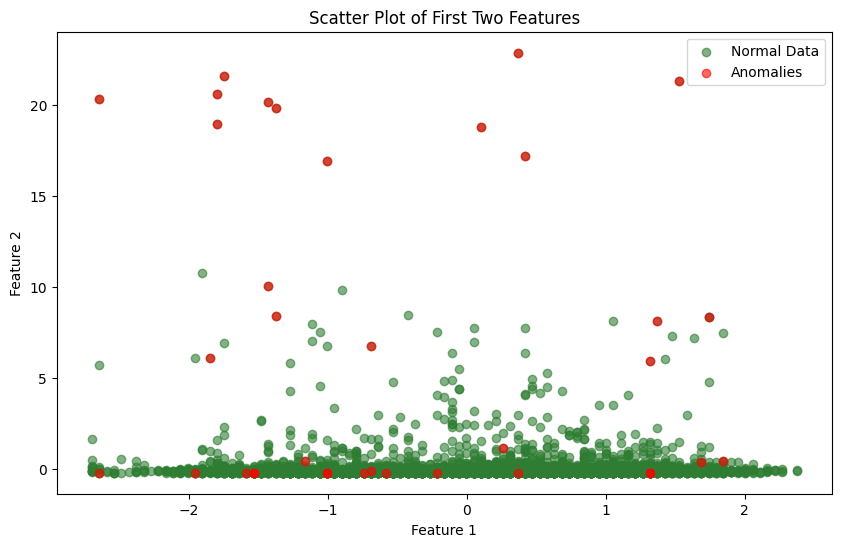

In [ ]:
# Scatter plot of the first two continuous features with anomalies highlighted
plt.figure(figsize=(10, 6))
plt.scatter(data_cont[:, 0], data_cont[:, 1], c=PAL[0], label='Normal Data', alpha=0.6)
plt.scatter(data_cont[outlier_indices, 0], data_cont[outlier_indices, 1], c='red', label='Anomalies', alpha=0.6)
plt.title('Scatter Plot of First Two Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# 3.3 Method: Local Outlier Factor

In [ ]:
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.005)
outliers_lof = lof.fit_predict(data_cont)

# Output results
print("Anomaly labels from LOF:", outliers_lof)

Anomaly labels from LOF: [1 1 1 ... 1 1 1]


In [ ]:
outlier_indices_LOF = np.where(predictions == -1)[0]

# Step 6: Extract the outlier datapoints using these indices
outliers_LOF = data_cont[outlier_indices_LOF]

print("Outlier indices:")
print(outlier_indices_LOF)
print("\nOutlier datapoints:")
print(outliers_LOF)
print(len(outliers_LOF))

Outlier indices:
[ 742 1258 1524 1881 1882 2069 2136 2209 2394 2503 2511 2702 2774 2906
 2931 3122 3932 3943 4704 4721 5065 5124 5316 5327 5411 5416 5507 5655
 5885 6040 6373 6407 6515 6701 7058 7094]

Outlier datapoints:
[[-5.83958787e-01 -2.05043143e-01  7.03354419e+00  8.91312052e+00
   5.84917185e-01  7.80676132e+00]
 [-1.95776119e+00 -2.11132526e-01  5.30907832e+00  3.90840799e+00
  -9.34741148e-01  5.50726923e+00]
 [-2.64465731e+00  2.03300871e+01 -3.94869244e-01 -2.09725370e+00
   9.51727362e-01 -2.33312856e+00]
 [ 1.31822447e+00 -2.11132526e-01  1.13977353e+01  3.24110855e+00
  -1.72077913e+00  6.53233120e+00]
 [-1.42937526e+00  2.01560092e+01 -1.72136314e+00 -2.45870340e+00
   6.37323489e-01 -2.61017474e+00]
 [-6.89639016e-01 -1.29317972e-01  6.10499847e+00  3.85279139e+00
  -4.63129680e-01  4.62072148e+00]
 [-1.42937526e+00  1.00592582e+01 -2.38461009e+00 -2.59773659e+00
  -2.01120793e-01 -2.66558397e+00]
 [-1.79924591e+00  2.05912155e+01 -1.37648901e+00 -1.79142059e+00
   1.

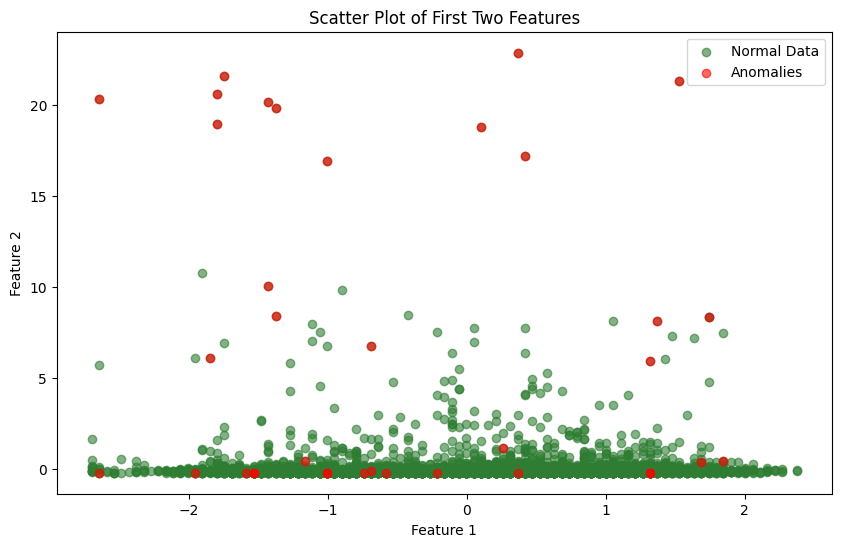

In [ ]:
# Scatter plot of the first two continuous features with anomalies highlighted
plt.figure(figsize=(10, 6))
plt.scatter(data_cont[:, 0], data_cont[:, 1], c=PAL[0], label='Normal Data', alpha=0.6)
plt.scatter(data_cont[outlier_indices_LOF, 0], data_cont[outlier_indices_LOF, 1], c='red', label='Anomalies', alpha=0.6)
plt.title('Scatter Plot of First Two Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
outlier_indices_LOF
common_cont_outliers= set(outlier_indices_LOF).intersection(set(outlier_indices)).intersection(set(anomaly_indices))
print("Common continuous outliers:")
print(common_cont_outliers)
print(len(common_cont_outliers))
common_cont_outliers_list = list(common_cont_outliers)


Common continuous outliers:
{2209, 5507, 5411, 5124, 6373, 2503, 5416, 7058, 2931, 1524, 2774, 1882, 5885}
13


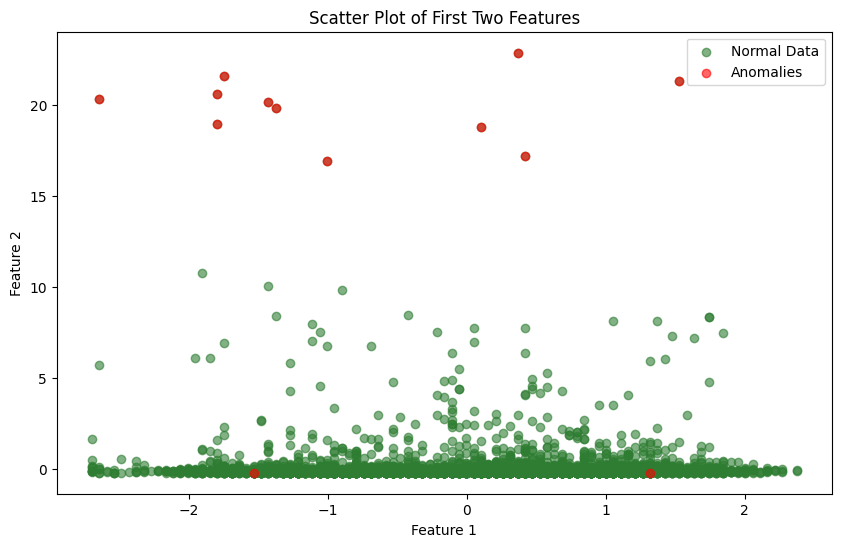

In [ ]:
# Scatter plot of the first two continuous features with anomalies highlighted
plt.figure(figsize=(10, 6))
plt.scatter(data_cont[:, 0], data_cont[:, 1], c=PAL[0], label='Normal Data', alpha=0.6)
plt.scatter(data_cont[common_cont_outliers_list, 0], data_cont[common_cont_outliers_list, 1], c='red', label='Anomalies', alpha=0.6)
plt.title('Scatter Plot of First Two Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## 4. Anamoly Detection on Mixed Data

# 4.1 Method: Hierarchical Clustering on Mixed Data

<ipython-input-37-10b1d3f9a154>:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(gower_dist, method='ward')


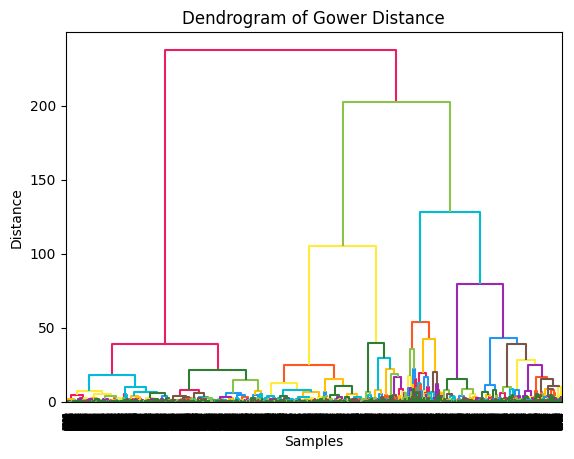

In [ ]:
X = df.values

# Compute Gower distance matrix
gower_dist = gower.gower_matrix(X)

# Use this distance matrix with hierarchical clustering and plot a dendogram
Z = linkage(gower_dist, method='ward')

# Create the dendrogram
dendrogram(Z, color_threshold=0, above_threshold_color=PAL[0], link_color_func=lambda k: PAL[k % len(PAL)])
plt.title("Dendrogram of Gower Distance")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()



In [ ]:
# Cut the forest to have a certain inter-cluster distance (max_d)
max_d = 39

In [ ]:
# Form the clusters
labels = fcluster(Z, max_d, criterion='distance')

original_lables = labels.copy()

# Confirm that you cut correctly, to have N clusters
K = labels.max()
print("We got %d cluster(s)." % K)

We got 11 cluster(s).


PCA: explained variation per principal component: [0.31 0.16]

Applying tSNE...


<ipython-input-9-c13bf6fbe739>:38: UserWarning: 
The palette list has fewer values (10) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], ax=ax1, hue=LABELS, palette=PAL)
<ipython-input-9-c13bf6fbe739>:45: UserWarning: 
The palette list has fewer values (10) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], ax=ax2, hue=LABELS, palette=PAL)


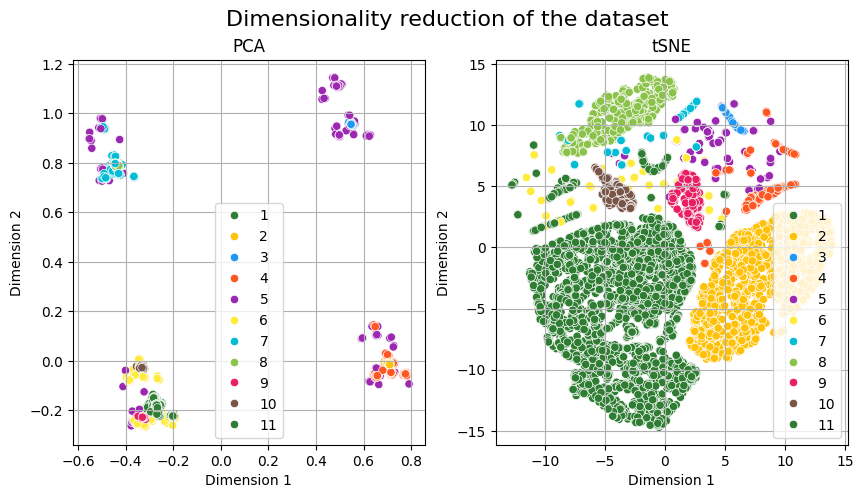

In [ ]:
# Now, you can run the following line
PCA_tSNE_visualization(X, 2, labels, PAL)

In [ ]:
# Compute S (Silhouette Score)
S = silhouette_score(gower_dist, labels, metric='precomputed')

# Print the score
print( 'For %d clusters,' % K, 'the silhouette score is = %.3f.' % S    )

For 11 clusters, the silhouette score is = 0.438.


In [ ]:
target_labels = [3,4,5,6,10]  # Replace with your desired labels

# Get the indices for the specified labels
indices = np.where(np.isin(labels, target_labels))[0]

# Get the data points for the specified labels
outliers = df.iloc[indices]

# Print the results
print(f"Indices for outliers {target_labels}:", indices)
print(f"Outliers{target_labels}:\n", outliers)

Indices for outliers [3, 4, 5, 6, 10]: [  11   14   17 ... 7186 7187 7191]
Outliers[3, 4, 5, 6, 10]:
             1   2   3   4   5   6   7   8   9   10  ...  12  13  14  15  16  \
12    0.177083   0   1   1   1   1   1   1   1   1  ...   1   1   1   1   0   
15    0.541667   0   1   1   1   1   1   1   1   1  ...   1   1   1   1   0   
18    0.666667   0   1   1   1   1   1   1   1   1  ...   1   1   1   1   0   
24    0.541667   0   1   1   1   1   1   1   1   1  ...   1   1   1   1   0   
28    0.802083   1   1   1   1   1   1   1   1   0  ...   1   1   1   1   1   
...        ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..   
7170  0.614583   0   1   1   1   0   1   1   1   1  ...   1   1   1   1   1   
7181  0.302083   0   1   1   1   1   1   1   1   1  ...   1   1   1   1   0   
7187  0.656250   0   1   1   1   1   1   1   1   1  ...   1   1   1   1   0   
7188  0.708333   0   1   1   1   1   1   1   1   0  ...   1   1   1   1   1   
7192  0.572917   1   1   1   

In [ ]:
labels[labels == 3] = -1
labels[labels == 4] = -1
labels[labels == 5] = -1
labels[labels == 6] = -1
labels[labels == 10] = -1

# Print the updated labels
print(labels)

[ 7  1  1 ... 11  2 11]


PCA: explained variation per principal component: [0.31 0.16]

Applying tSNE...


<ipython-input-9-c13bf6fbe739>:38: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], ax=ax1, hue=LABELS, palette=PAL)
<ipython-input-9-c13bf6fbe739>:45: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], ax=ax2, hue=LABELS, palette=PAL)


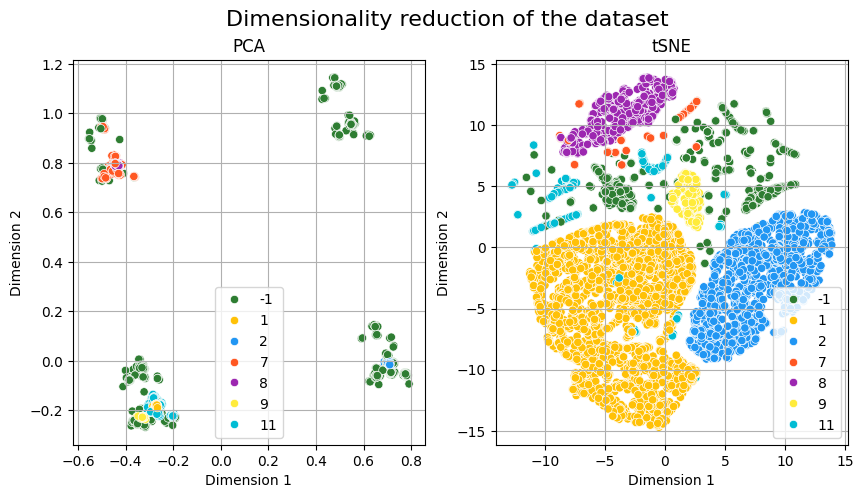

In [ ]:
# Now, you can run the following line
PCA_tSNE_visualization(X, 2, labels, PAL)

# 4.2 Method: Isolation Forest on Mixed Data

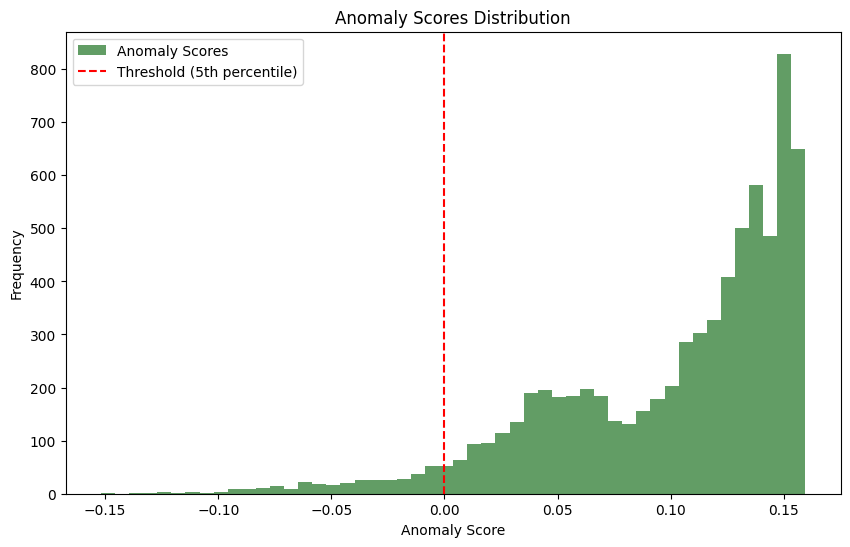

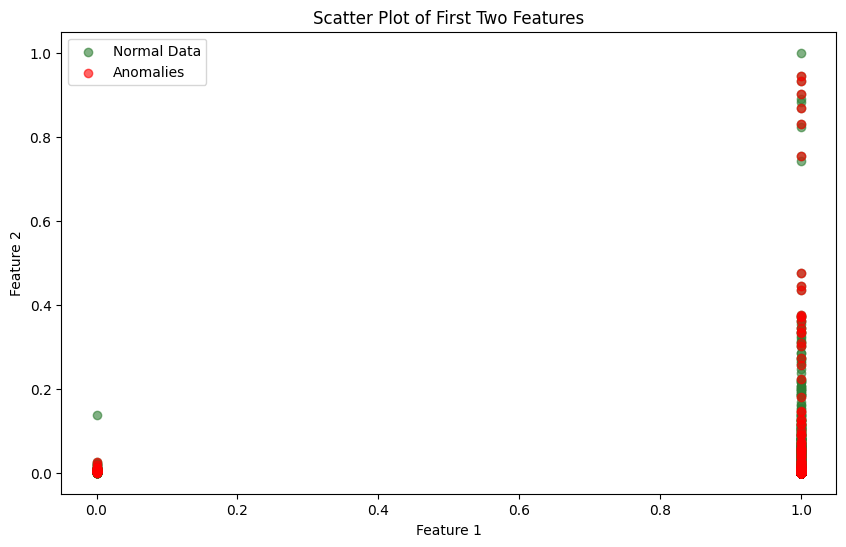

   Anomaly Score  Is Anomaly
0      -0.008147        True
1       0.125555       False
2       0.139148       False
3       0.133561       False
4       0.130833       False


In [ ]:
# Initialize and train the Isolation Forest model
isoforest = IsolationForest(contamination=0.05, random_state=42)
isoforest.fit(data)

# Predict anomaly scores
scores = isoforest.decision_function(data)  # The lower, the more anomalous
threshold = np.percentile(scores, 5)  # Setting threshold at the 5th percentile
anomalies = data[scores < threshold]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=50, alpha=0.75, color=PAL[0], label='Anomaly Scores')
plt.axvline(threshold, color='red', linestyle='--', label='Threshold (5th percentile)')
plt.title('Anomaly Scores Distribution')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Scatter plot of the first two continuous features with anomalies highlighted
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 15], data[:, 15 + 1], color=PAL[0], label='Normal Data', alpha=0.6)
plt.scatter(anomalies[:, 15], anomalies[:, 15 + 1], c='red', label='Anomalies', alpha=0.6)
plt.title('Scatter Plot of First Two Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Display anomaly scores in a DataFrame for user review
anomaly_scores_df = pd.DataFrame({'Anomaly Score': scores, 'Is Anomaly': scores < threshold})
print(anomaly_scores_df.head())

# 4.3 Method: Variational Autoencoder (VAE) for Mixed Data


In [ ]:

# VAE parameters
input_dim = data_mixed.shape[1]
latent_dim = 2  # Dimension of latent space
intermediate_dim = 64
batch_size = 100
epochs = 50

# Encoder
inputs = Input(shape=(input_dim,))
h = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_var / 2) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(input_dim)
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# VAE model
vae = Model(inputs, x_decoded_mean)

# Loss function
xent_loss = input_dim * mse(inputs, x_decoded_mean)
kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')
vae.summary()

# Train the VAE
vae.fit(data_mixed, data_mixed, shuffle=True, epochs=epochs, batch_size=batch_size, validation_split=0.2)





Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 21)]                 0         []                            
                                                                                                  
 dense_18 (Dense)            (None, 64)                   1408      ['input_5[0][0]']             
                                                                                                  
 dense_19 (Dense)            (None, 2)                    130       ['dense_18[0][0]']            
                                                                                                  
 dense_20 (Dense)            (None, 2)                    130       ['dense_18[0][0]']            
                                                                                            

In [ ]:
# Reconstruct data using the VAE
reconstructed_data = vae.predict(data_mixed)
reconstructed_binary = reconstructed_data[:, :15]
reconstructed_continuous = reconstructed_data[:, 15:]

# Calculate MSE loss between original and reconstructed data
mse_loss = np.mean(np.square(data_mixed - reconstructed_data), axis=1)

# Calculate MSE loss separately for binary and continuous attributes
mse_loss_binary = np.mean(np.square(data_binary - reconstructed_binary), axis=1)
mse_loss_continuous = np.mean(np.square(data_cont - reconstructed_continuous), axis=1)

# Determine the threshold as the 99th percentile of the MSE loss
threshold = np.percentile(mse_loss, 99)

# Identify anomalies based on the threshold
anomalies = mse_loss > threshold
anomalies_no = data_mixed[mse_loss > threshold]


print(f"Detected {len(anomalies_no)} anomalies.")

# Create a DataFrame for visualization
results_df = pd.DataFrame({
    'MSE Loss': mse_loss,
    'Anomaly': mse_loss > threshold
})

# Analyze the results to see if anomalies are more prominent in binary or continuous data
anomalies_binary = mse_loss_binary[anomalies]
anomalies_continuous = mse_loss_continuous[anomalies]

# Summary statistics
print(f"Average MSE Loss for Binary Attributes (Anomalies): {np.mean(anomalies_binary)}")
print(f"Average MSE Loss for Continuous Attributes (Anomalies): {np.mean(anomalies_continuous)}")

225/225 [==============================] - 0s 2ms/step
Detected 72 anomalies.
Average MSE Loss for Binary Attributes (Anomalies): 0.058030247509530085
Average MSE Loss for Continuous Attributes (Anomalies): 2.29561925717398


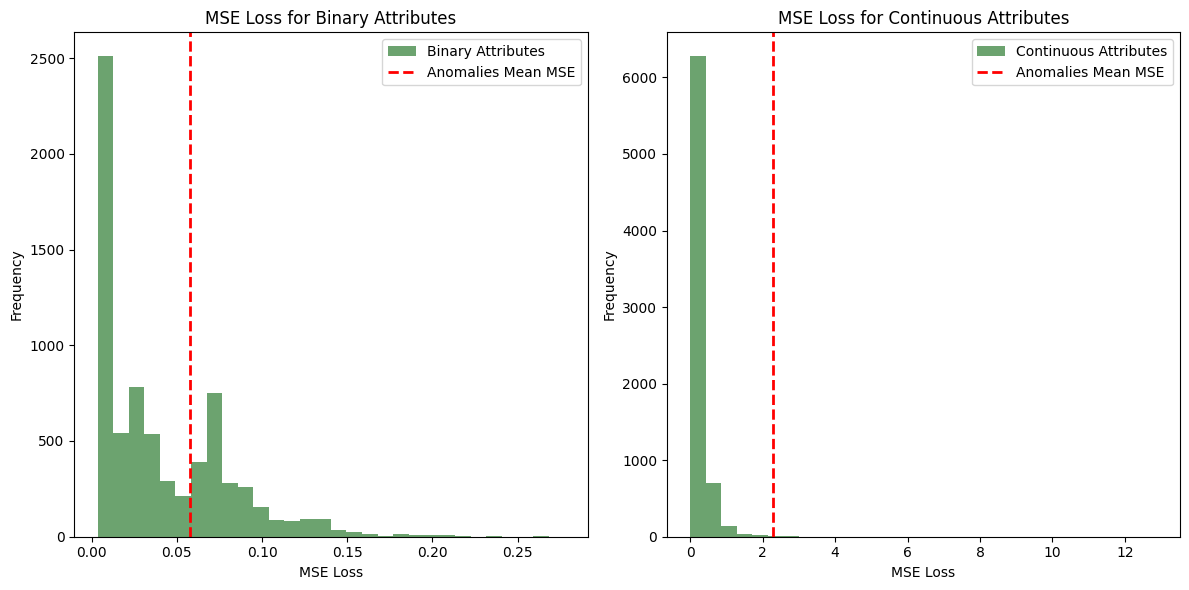

In [ ]:
# Plot histograms of MSE losses for binary and continuous attributes
plt.figure(figsize=(12, 6))

# Histogram for binary attributes
plt.subplot(1, 2, 1)
plt.hist(mse_loss_binary, bins=30, alpha=0.7, label='Binary Attributes', color=PAL[0])
plt.axvline(np.mean(anomalies_binary), color='r', linestyle='dashed', linewidth=2, label='Anomalies Mean MSE')
plt.xlabel('MSE Loss')
plt.ylabel('Frequency')
plt.title('MSE Loss for Binary Attributes')
plt.legend()

# Histogram for continuous attributes
plt.subplot(1, 2, 2)
plt.hist(mse_loss_continuous, bins=30, alpha=0.7, label='Continuous Attributes', color=PAL[0])
plt.axvline(np.mean(anomalies_continuous), color='r', linestyle='dashed', linewidth=2, label='Anomalies Mean MSE')
plt.xlabel('MSE Loss')
plt.ylabel('Frequency')
plt.title('MSE Loss for Continuous Attributes')
plt.legend()

plt.tight_layout()
plt.show()


Detected Anomalies: 72 data points are identified as anomalies.

MSE Loss Analysis: The average MSE loss for continuous attributes among anomalies is significantly higher than that for binary attributes, indicating that the anomalies are primarily due to deviations in continuous data.

Visualization: Histograms can provide a visual representation of the MSE loss distributions, further supporting the analysis.

Interpretation
The much higher average MSE loss for continuous attributes compared to binary attributes suggests that the anomalies are primarily due to deviations in the continuous attributes rather than the binary attributes. This means that the continuous attributes are more challenging for the VAE to reconstruct accurately in the anomalous data points, indicating that the anomalies are more likely driven by unusual patterns or values in the continuous data.

<ipython-input-54-87a37bb2af33>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  plt.plot(normal.index, normal['MSE Loss'], 'b.', label='Normal', color=PAL[0])


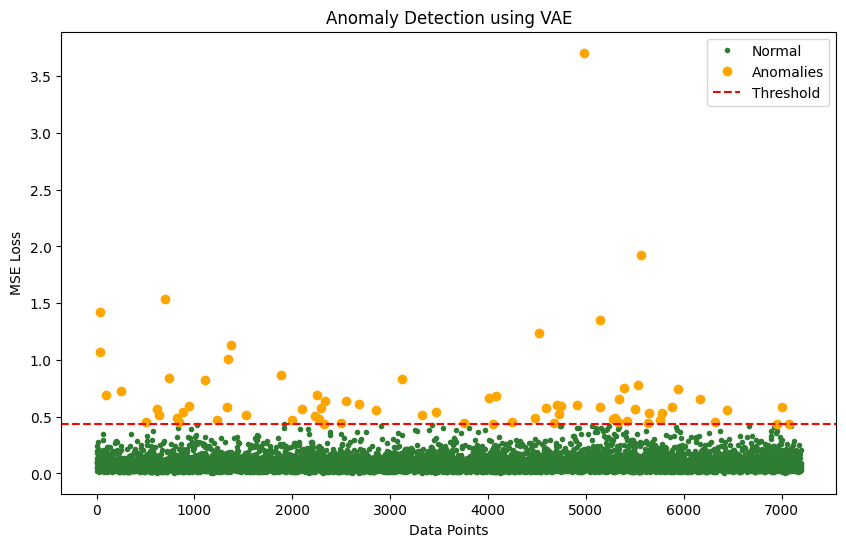

Detected 7200 anomalies.
Threshold for anomaly detection: 0.43350696401422056


In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
normal = results_df[results_df['Anomaly'] == False]
anomalous = results_df[results_df['Anomaly'] == True]

plt.plot(normal.index, normal['MSE Loss'], 'b.', label='Normal', color=PAL[0])
plt.plot(anomalous.index, anomalous['MSE Loss'], 'o', color='orange', label='Anomalies')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title('Anomaly Detection using VAE')
plt.xlabel('Data Points')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

# Output the anomalies
print(f"Detected {len(anomalies)} anomalies.")
print(f"Threshold for anomaly detection: {threshold}")

In [ ]:
# Calculate probabilities using MSE loss values (normalized)
max_mse_loss = np.max(mse_loss)
min_mse_loss = np.min(mse_loss)
probabilities = (mse_loss - min_mse_loss) / (max_mse_loss - min_mse_loss)

# Add probabilities to the results DataFrame
results_df['Anomaly Probability'] = probabilities

# Convert the original data to a DataFrame
data_mixed_df = pd.DataFrame(data_mixed, columns=[f'feature_{i+1}' for i in range(data_mixed.shape[1])])

# Combine original data with the results DataFrame
export_df = pd.concat([data_mixed_df, results_df], axis=1)

# Export the data to a CSV file
export_df.to_csv('data_with_anomalies_and_probabilities.csv', index=False)


## Helper Functions

In [ ]:
# [FROM SOLUTION OF LAB#4] THIS IS A **METHOD** THAT YOU CAN USE IN THE NEXT LAB SESSIONS TO find visualize data in 2D with clusters in different colours

def PCA_tSNE_visualization(data2visualize, NCOMP, LABELS, PAL):

  '''
  INPUT
  data2visualize    - data matrix to visualize
  NCOMP             - no. of components to decompose the dataset during PCA
  LABELS            - labels given by the clustering solution
  PAL               - palette of colours to distinguish between clusters
  '''

  '''
  OUTPUT
  Two figures: one using PCA and one using tSNE
  '''


  # PCA
  pca = PCA(n_components=NCOMP)
  pca_result = pca.fit_transform(data2visualize)
  print('PCA: explained variation per principal component: {}'.format(pca.explained_variance_ratio_.round(2)))

  # tSNE
  print('\nApplying tSNE...')
  np.random.seed(100)
  tsne = TSNE(n_components=2, verbose=0, perplexity=20, n_iter=300)
  tsne_results = tsne.fit_transform(data2visualize)


  # Plots
  fig1000 = plt.figure(figsize=(10,5))
  fig1000.suptitle('Dimensionality reduction of the dataset', fontsize=16)


  # Plot 1: 2D image of the entire dataset
  ax1 = fig1000.add_subplot(121)
  sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], ax=ax1, hue=LABELS, palette=PAL)
  ax1.set_xlabel('Dimension 1', fontsize=10)
  ax1.set_ylabel('Dimension 2', fontsize=10)
  ax1.title.set_text('PCA')
  plt.grid()

  ax2= fig1000.add_subplot(122)
  sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], ax=ax2, hue=LABELS, palette=PAL)
  ax2.set_xlabel('Dimension 1', fontsize=10)
  ax2.set_ylabel('Dimension 2', fontsize=10)
  ax2.title.set_text('tSNE')
  plt.grid()
  plt.show()